## Algorithm

In [1]:
# helpers
def left(i):
    """
    Returns the index of the left child of i
    """
    return 2 * i + 1

def right(i):
    """
    Returns the index of the right child of i
    """
    return 2 * i + 2

def parent(i):
    """
    Returns the index of the parent of i
    """
    return (i - 1) // 2

In [2]:
def insert(heap, val):
    """
    Inserts a value into the heap at the end, then bubbles it up to correct position.
    """
    heap.append(val)
    i = len(heap)-1
    while i > 0 and heap[parent(i)] < heap[i]:
        parent_i = parent(i)
        temp = heap[parent_i]
        heap[parent_i] = heap[i]
        heap[i] = temp
        i = parent_i

# insertion heapify
def insertion_heapify(A, *args):
    """
    Heapify using insertion method and adding elements one by one
    """
    heap = []
    for i in range(len(A)):
        insert(heap, A[i])
    A[:] = heap

In [3]:
# bubble method 1
def bubble_method_1(A, i):
    """
    Bubble down until value is bigger than both children (we'll call this "Bubble Method 1")
    Choose the bigger child and swap with it while comparing with itself, then repeat until no more swaps are needed
    """
    n = len(A)
    l = left(i)
    r = right(i)
    while (l < n and A[i] < A[l]) or (r < n and A[i] < A[r]):
        if l < n and r < n:
            # left
            if A[l] > A[r]:
                temp = A[l]
                A[l] = A[i]
                A[i] = temp
                i = l
            # right
            else:
                temp = A[r]
                A[r] = A[i]
                A[i] = temp
                i = r
        elif l < n:
            # left
            temp = A[l]
            A[l] = A[i]
            A[i] = temp
            i = l
        elif r < n:
            # right
            temp = A[r]
            A[r] = A[i]
            A[i] = temp
            i = r
        l = left(i)
        r = right(i)


In [4]:
# bubble method 2
def bubble_method_2(A, i):
    """
    Bubble down all the way, then bubble up until value is smaller than parent
    Choose the bigger child and swap with it all the way down, then go back up until smaller than parent
    """
    n = len(A)
    l = left(i)
    r = right(i)
    while l < n:
        if r < n:
            # left
            if A[l] > A[r]:
                temp = A[l]
                A[l] = A[i]
                A[i] = temp
                i = l
            # right
            else:
                temp = A[r]
                A[r] = A[i]
                A[i] = temp
                i = r
        else:
            # left
            temp = A[l]
            A[l] = A[i]
            A[i] = temp
            i = l
        l = left(i)
        r = right(i)
    
    # bubble up
    parent_i = parent(i)
    while i > 0 and A[parent_i] < A[i]:
        temp = A[parent_i]
        A[parent_i] = A[i]
        A[i] = temp
        i = parent_i
        parent_i = parent(i)

In [5]:
def heapify(A, bubble_down=bubble_method_1):
    """
    Heapify using the passed in bubble_down method and build the heap buttom up
    """
    heapify_h(A, 0, bubble_down)

def heapify_h(A, i, bubble_down):
    """
    Heapify wrapper calling helper
    """
    if i < len(A)//2:
        heapify_h(A, left(i), bubble_down)
        heapify_h(A, right(i), bubble_down)
        bubble_down(A, i)

## Testing

In [6]:
def heap_test(A):
    """
    Test the given array A to see if it is a heap
    """
    n = len(A)
    for i in range(n//2):
        l = left(i)
        r = right(i)
        if l < n and A[i] < A[l]:
            return False
        if r < n and A[i] < A[r]:
            return False
    return True

In [7]:
import unittest

class TestHeapify(unittest.TestCase):
    """
    Each test case follows the order:
        1. Test Bubble Method 1
        2. Test Bubble Method 2
        3. Test Insertion Method
    """
    def test_already_heap(self):
        A = [9, 8, 7, 6, 5, 4, 3, 2, 1]
        heapify(A, bubble_method_1)
        self.assertTrue(heap_test(A))

        A = [9, 8, 7, 6, 5, 4, 3, 2, 1]
        heapify(A, bubble_method_2)
        self.assertTrue(heap_test(A))

        A = [9, 8, 7, 6, 5, 4, 3, 2, 1]
        insertion_heapify(A)
        self.assertTrue(heap_test(A))

    def test_need_heap(self):
        A = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        heapify(A, bubble_method_1)
        self.assertTrue(heap_test(A))

        A = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        heapify(A, bubble_method_2)
        self.assertTrue(heap_test(A))

        A = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        insertion_heapify(A)
        self.assertTrue(heap_test(A))
    
    def test_all_equal(self):
        A = [10, 10, 10, 10, 10, 10, 10, 10, 10]
        heapify(A, bubble_method_1)
        self.assertTrue(heap_test(A))

        A = [10, 10, 10, 10, 10, 10, 10, 10, 10]
        heapify(A, bubble_method_2)
        self.assertTrue(heap_test(A))

        A = [10, 10, 10, 10, 10, 10, 10, 10, 10]
        insertion_heapify(A)
        self.assertTrue(heap_test(A))

    def test_one_element(self):
        A = [10]
        heapify(A, bubble_method_1)
        self.assertTrue(heap_test(A))

        A = [10]
        heapify(A, bubble_method_2)
        self.assertTrue(heap_test(A))

        A = [10]
        insertion_heapify(A)
        self.assertTrue(heap_test(A))

    def test_empty(self):
        A = []
        heapify(A, bubble_method_1)
        self.assertTrue(heap_test(A))

        A = []
        heapify(A, bubble_method_2)
        self.assertTrue(heap_test(A))

        A = []
        insertion_heapify(A)
        self.assertTrue(heap_test(A))

unittest.main(argv=[''], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


### Benchmarking

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import random

In [9]:
def benchmark(A, heapify, bubble_down=None):
    """
    Benchmark the passed in heaify algorithm on array A
    """
    start = time.perf_counter()
    if bubble_down:
        heapify(A, bubble_down)
    else:
        heapify(A)
    end = time.perf_counter()
    return (end - start)

In [ ]:
# DataFrame set up
sizes = [20000*x for x in range(1, 101)]
index = pd.MultiIndex.from_product([['insertion', 'bubble_method_1', 'bubble_method_2'], sizes], names=['method', 'size'])
df = pd.DataFrame(index=index, columns=['sorted', 'reverse_sorted', 'random'])

In [11]:
for i in tqdm(sizes):
    # sorted
    A = [x for x in range(i)]
    df.loc[('insertion', i), 'sorted'] = benchmark(A, insertion_heapify)
    df.loc[('bubble_method_1', i), 'sorted'] = benchmark(A, heapify, bubble_method_1)
    df.loc[('bubble_method_2', i), 'sorted'] = benchmark(A, heapify, bubble_method_2)

    # reverse sorted
    A = [x for x in range(i-1, -1, -1)]
    df.loc[('insertion', i), 'reverse_sorted'] = benchmark(A, insertion_heapify)
    df.loc[('bubble_method_1', i), 'reverse_sorted'] = benchmark(A, heapify, bubble_method_1)
    df.loc[('bubble_method_2', i), 'reverse_sorted'] = benchmark(A, heapify, bubble_method_2)

    # random
    A = [random.randint(0, 10000) for _ in range(i)]
    df.loc[('insertion', i), 'random'] = benchmark(A, insertion_heapify)
    df.loc[('bubble_method_1', i), 'random'] = benchmark(A, heapify, bubble_method_1)
    df.loc[('bubble_method_2', i), 'random'] = benchmark(A, heapify, bubble_method_2)


100%|██████████| 100/100 [14:31<00:00,  8.72s/it]


In [74]:
import dill
with open('heapify_benchmark.db', 'wb') as f:
    dill.dump(df, f)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Graphs for Each Function

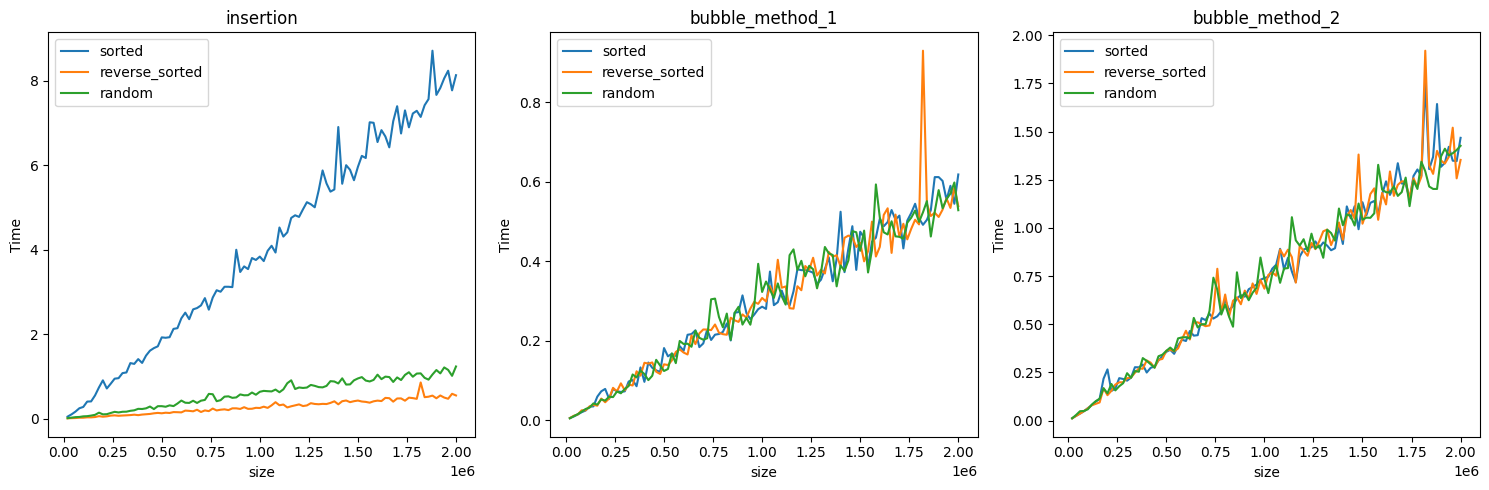

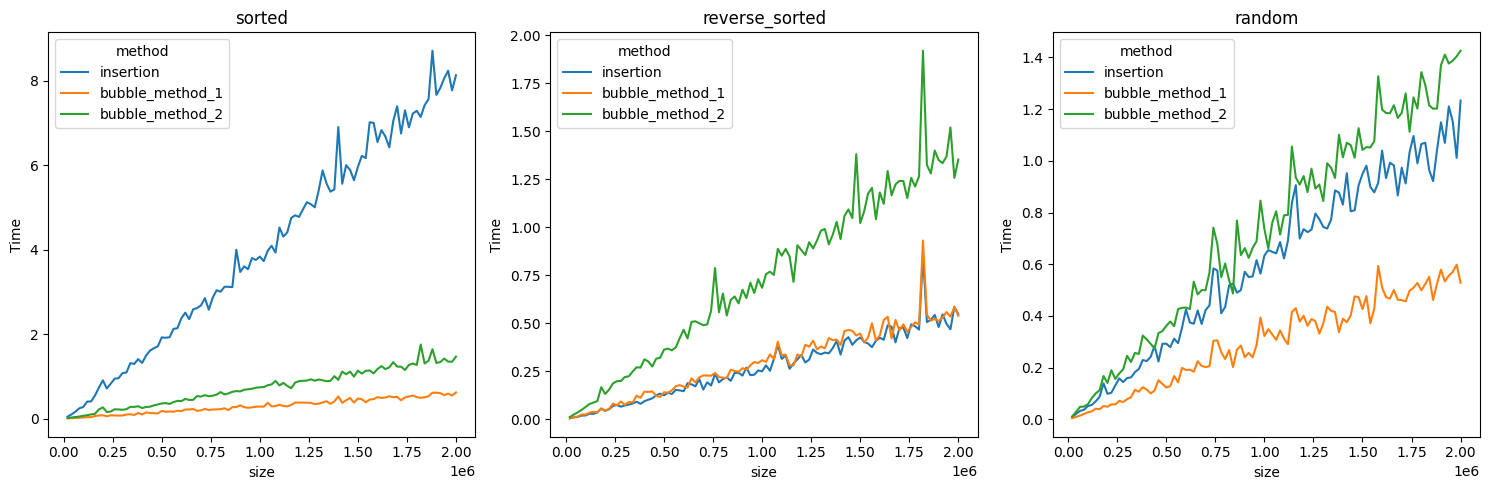

In [ ]:
plt.figure(figsize=(15, 5))
for i, method in enumerate(['insertion', 'bubble_method_1', 'bubble_method_2'], 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=df.loc[method], x='size', y='sorted', label='sorted').set_ylabel('Time')
    sns.lineplot(data=df.loc[method], x='size', y='reverse_sorted', label='reverse_sorted').set_ylabel('Time')
    sns.lineplot(data=df.loc[method], x='size', y='random', label='random').set_ylabel('Time')
    plt.title(f'{method}')
plt.savefig(f'images/methods.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, case in enumerate(df.columns, 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=df, x='size', y=case, hue='method').set_ylabel('Time')
    plt.title(f'{case}')
plt.savefig(f'images/cases.png')
plt.tight_layout()
plt.show()